In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("uci breast cancer dataset - uci breast cancer dataset.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df = df.drop(['id'], axis = 'columns')

In [6]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<Axes: xlabel='diagnosis', ylabel='count'>

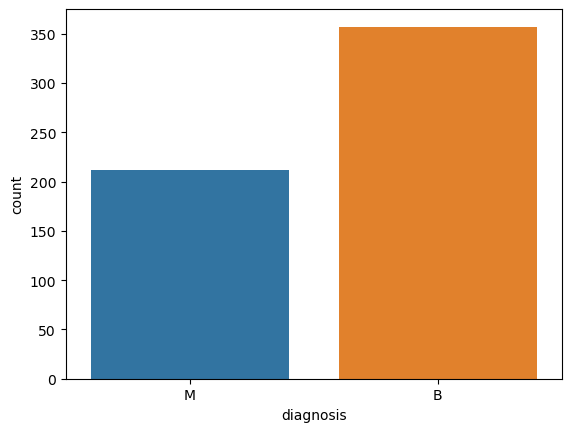

In [7]:
sns.countplot(x='diagnosis',data=df)

In [8]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

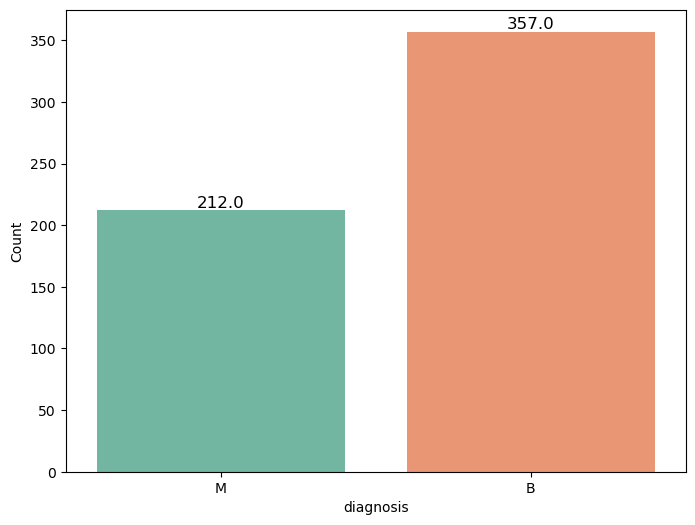

In [9]:
# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='diagnosis', data=df, palette='Set2')

# Annotate the bars with their respective counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12)

# Optionally, you can set the y-axis label
plt.ylabel('Count')

# Show the plot
plt.show()


In [10]:
x = df.drop('diagnosis',axis=1)

In [11]:
y = df[['diagnosis']]

# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=42, test_size=.30)

In [13]:
ytest

,diagnosis
204,B
70,M
131,M
431,B
540,B
...,...
69,B
542,B
176,B
501,M


In [14]:
ytest.shape

(171, 1)

In [15]:
xtest.shape

(171, 30)

# Step 3: Decision Tree model and evaluation

In [16]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(xtrain, ytrain)
y_pred_dt = dt_model.predict(xtest)

In [17]:
y_pred_dt

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

# Evaluate Decision Tree model performance

In [18]:
print("Decision Tree Model Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt), '\n')
print("Classification Report:")
print(classification_report(ytest, y_pred_dt))

Decision Tree Model Performance:
Accuracy: 0.9415204678362573 

Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.94      0.95       108
           M       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



# Step 4: Random Forest model and evaluation

In [19]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(xtrain, ytrain)
y_pred_rf = rf_model.predict(xtest)

In [20]:
y_pred_rf

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

# Evaluate Random Forest model performance

In [21]:
print("\nRandom Forest Model Performance:") 
print("Accuracy:", accuracy_score(ytest, y_pred_rf), '\n') 
print("Classification Report:") 
print(classification_report(ytest, y_pred_rf)) 


Random Forest Model Performance:
Accuracy: 0.9707602339181286 

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Pre - Pruning for Cost Complexity

# Initialized Hyperparameters

In [22]:
# Define hyperparameters for Decision Tree 
dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


#Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300], #https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [23]:
# Perform Grid Search for Decision Tree
dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=dt_params, cv=5)
dt_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [24]:
dt_grid_search.cv_results_

{'mean_fit_time': array([0.        , 0.00472689, 0.00513425, 0.        , 0.        ,
        0.00320506, 0.00312529, 0.00312519, 0.00492773, 0.00140243,
        0.00312519, 0.        , 0.0061276 , 0.00312724, 0.00312524,
        0.00312524, 0.00422759, 0.00312529, 0.        , 0.00230241,
        0.00312729, 0.        , 0.00625496, 0.00320497, 0.00625257,
        0.00312524, 0.00635939, 0.        , 0.00312524, 0.        ,
        0.00352969, 0.        , 0.00312519, 0.00312519, 0.00320363,
        0.00385838, 0.00497518, 0.        , 0.00312729, 0.00312519,
        0.00313191, 0.00320497, 0.00312729, 0.00613899, 0.00310149,
        0.        , 0.00625038, 0.00312519, 0.00532765, 0.        ,
        0.00625038, 0.        , 0.00100236, 0.        , 0.00805469,
        0.00160127, 0.00313396, 0.00040617, 0.00449004, 0.00040445,
        0.00646586, 0.00040035, 0.00631666, 0.00286846, 0.00378957,
        0.00200033, 0.0029757 , 0.00312672, 0.00312519, 0.00625043,
        0.0041296 , 0.00312529,

In [25]:
tuning_result_dt_gs = pd.DataFrame(dt_grid_search.cv_results_)
tuning_result_dt_gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000000,0.000000,0.005769,0.007204,gini,None,1,2,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.911392,0.909620,0.016292,117
1,0.004727,0.005453,0.002240,0.000460,gini,None,1,2,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9375,0.9000,0.9625,0.911392,0.949367,0.932152,0.023284,37
2,0.005134,0.005581,0.000800,0.000980,gini,None,1,5,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9250,0.936709,0.936709,0.919684,0.018414,89
3,0.000000,0.000000,0.003125,0.006250,gini,None,1,5,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9250,0.8875,0.9625,0.924051,0.962025,0.932215,0.028014,21
4,0.000000,0.000000,0.003125,0.006250,gini,None,1,10,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9375,0.8875,0.9250,0.911392,0.924051,0.917089,0.016945,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.000800,0.000980,0.003810,0.005250,entropy,30,4,2,random,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.9125,0.8750,0.9625,0.949367,0.936709,0.927215,0.030883,61
140,0.003883,0.000676,0.001800,0.000980,entropy,30,4,5,best,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.9500,0.8875,0.9625,0.949367,0.924051,0.934684,0.026696,5
141,0.003325,0.003731,0.001802,0.000981,entropy,30,4,5,random,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.9125,0.8750,0.9625,0.949367,0.936709,0.927215,0.030883,61
142,0.005135,0.004689,0.001000,0.001265,entropy,30,4,10,best,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.9250,0.8875,0.9625,0.949367,0.924051,0.929684,0.025681,41


In [26]:
dt_grid_search.best_params_ #clf = dt_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'splitter': 'best'}

# Perform Grid Search for Random Forest
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_params, cv=5)
rf_grid_search.fit(xtrain, ytrain)

# Evaluate the optimized models

In [27]:
# Decision Tree and Grid Search
y_pred_dt_gs = dt_grid_search.predict(xtest)
print("\nDecision Tree Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_gs))



Decision Tree Grid Search Performance:
Accuracy: 0.9590643274853801
Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.98      0.97       108
           M       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [28]:
# Random Forest Grid Search
# y_pred_rf_gs = rf_grid_search.predict(xtest)
# print("\nRandom Forest Grid Search Performance:")
# print("Accuracy:", accuracy_score(ytest, y_pred_rf_gs))
# print("Classification Report:")
# print(classification_report(ytest, y_pred_rf_gs))


# Hyperparameter optimization using Randomized Search

In [29]:
## Perform Randomized Search for Decision Tree
# dt_random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
#                                       param_distributions=dt_params, n_iter=100, cv=5, random_state=42)
# dt_random_search.fit(xtrain, ytrain)


In [30]:
# dt_random_search.cv_results_

In [31]:
# tuning_result_dt_rs = pd.DataFrame(dt_random_search.cv_results_)
# tuning_result_dt_rs

In [32]:
dt_random_search.best_params_

NameError: name 'dt_random_search' is not defined

# Perform Randomized Search for Random Forest

In [ ]:
# rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
#                                       param_distributions=rf_params, n_iter=100, cv=5, random_state=42)
# rf_random_search.fit(xtrain, ytrain)

In [ ]:
# rf_random_search.cv_results_
# tuning_result_rf_rs = pd.DataFrame(rf_random_search.cv_results_)
# tuning_result_rf_rs

In [ ]:
rf_random_search.best_params_

# Evaluate the optimized models for Randomized Search

# Decision Tree Randomized Search

In [ ]:
y_pred_dt_rs = dt_random_search.predict(xtest)
print("\n Decision Tree Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_rs))

# Random Forest Randomized Search

In [ ]:
y_pred_rf_rs = rf_random_search.predict(xtest)
print("\n Random Forest Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_rf_rs))

# Post Pruning for Decision Tree

In [ ]:
dt_clf = dt_random_search.best_estimator_
dt_clf

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_clf, filled=True, feature_names = x.columns)

In [ ]:
#https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
pruning_path = dt_clf.cost_complexity_pruning_path(xtrain, ytrain) # clf = DecisionTreeClassifier  
ccp_alpha_values = pruning_path.ccp_alphas 

In [ ]:
ccp_alpha_values 

In [ ]:
clfs_list = []  # save diffrent classifiers

for c in ccp_alpha_values:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=c)
    clf.fit(xtrain, ytrain)
    clfs_list.append(clf)
    

In [ ]:
clfs_list 

In [ ]:
train_scores = [ clf.score(xtrain, ytrain) for clf in clfs_list ] 
test_scores = [ clf.score(xtest, ytest) for clf in clfs_list ] 

In [ ]:
train_scores

In [ ]:
test_scores

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")

ax.plot(ccp_alpha_values, train_scores, marker='o', label="training accuracy", drawstyle="steps-post")
ax.plot(ccp_alpha_values, test_scores, marker='o', label="testing accuracy", drawstyle="steps-post")
ax.legend()

In [ ]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)
clf.fit(xtrain, ytrain)

In [ ]:
pred=clf.predict(xtest)
accuracy_score(ytest, pred)

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names = x.columns)

# XGBoost

In [ ]:
#random & grid
#before performance & after performance

In [34]:
!pip install xgboost

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(ytrain)

In [56]:
import xgboost as xgb

In [57]:
from xgboost import XGBClassifier

In [58]:
xgb_classifier = XGBClassifier()

In [60]:
xgb_classifier.fit(X = x_train,y = y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [61]:
y_pred_dt = xgb_classifier.predict(xtest)

In [62]:
y_pred_dt

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [70]:
y_pred = xgb_classifier.predict(xtest)
y_pred = le.inverse_transform(y_pred)
cm = confusion_matrix(ytest, y_pred)
print(cm)
accuracy_score(ytest, y_pred)

[[107   1]
 [  2  61]]


0.9824561403508771

# for pruning

In [93]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2]
}

In [94]:
# Perform Grid Search for Decision Tree
dt_grid_search  = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
dt_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [95]:
dt_grid_search.cv_results_

{'mean_fit_time': array([0.13165731, 0.24370036, 0.35577841, 0.15358386, 0.29468403,
        0.42341866, 0.1741488 , 0.33819227, 0.47603278, 0.0864233 ,
        0.12903538, 0.16614723, 0.10272856, 0.13973851, 0.17304811,
        0.10452905, 0.14334149, 0.17994976, 0.06851649, 0.10012794,
        0.1267386 , 0.07491956, 0.10292954, 0.13173494, 0.07522092,
        0.10792937, 0.1371398 , 0.12563682, 0.23666673, 0.34419174,
        0.15354309, 0.29498096, 0.41671534, 0.17204728, 0.33109255,
        0.47233257, 0.08692484, 0.12943702, 0.1678463 , 0.10032792,
        0.1370369 , 0.17905097, 0.10883055, 0.14684005, 0.18425345,
        0.0677186 , 0.10893054, 0.14604049, 0.07272267, 0.11133161,
        0.1525465 , 0.07512102, 0.11453328, 0.15244193, 0.12583609,
        0.24797173, 0.35070114, 0.16194654, 0.2977818 , 0.42091503,
        0.17104883, 0.32838883, 0.47563519, 0.08692412, 0.13723912,
        0.18945575, 0.10102897, 0.14834232, 0.19945521, 0.10752931,
        0.15794473, 0.20811181,

In [96]:
tuning_result_dt_gs = pd.DataFrame(dt_grid_search.cv_results_)
tuning_result_dt_gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.131657,0.001407,0.003200,0.000400,0,0.01,3,100,"{'gamma': 0, 'learning_rate': 0.01, 'max_depth...",0.9625,0.9125,0.9250,0.936709,0.949367,0.937215,0.017591,79
1,0.243700,0.003740,0.003601,0.000800,0,0.01,3,200,"{'gamma': 0, 'learning_rate': 0.01, 'max_depth...",0.9625,0.9250,0.9500,0.924051,0.949367,0.942184,0.015163,69
2,0.355778,0.011435,0.002600,0.000490,0,0.01,3,300,"{'gamma': 0, 'learning_rate': 0.01, 'max_depth...",0.9625,0.9250,0.9625,0.949367,0.949367,0.949747,0.013697,62
3,0.153584,0.008320,0.002401,0.000490,0,0.01,4,100,"{'gamma': 0, 'learning_rate': 0.01, 'max_depth...",0.9625,0.9250,0.9250,0.936709,0.949367,0.939715,0.014522,72
4,0.294684,0.008800,0.002801,0.000400,0,0.01,4,200,"{'gamma': 0, 'learning_rate': 0.01, 'max_depth...",0.9625,0.9125,0.9500,0.924051,0.962025,0.942215,0.020384,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.130736,0.008568,0.002901,0.000199,0.2,0.2,4,200,"{'gamma': 0.2, 'learning_rate': 0.2, 'max_dept...",0.9750,0.9375,0.9625,0.974684,0.962025,0.962342,0.013637,40
77,0.182692,0.009724,0.002804,0.000402,0.2,0.2,4,300,"{'gamma': 0.2, 'learning_rate': 0.2, 'max_dept...",0.9750,0.9375,0.9625,0.974684,0.962025,0.962342,0.013637,40
78,0.081223,0.004996,0.003001,0.001096,0.2,0.2,5,100,"{'gamma': 0.2, 'learning_rate': 0.2, 'max_dept...",0.9875,0.9500,0.9625,0.974684,0.949367,0.964810,0.014666,13
79,0.125235,0.007956,0.002491,0.000465,0.2,0.2,5,200,"{'gamma': 0.2, 'learning_rate': 0.2, 'max_dept...",0.9875,0.9500,0.9625,0.974684,0.949367,0.964810,0.014666,13


In [97]:
y_pred_gs = dt_grid_search.predict(xtest)
y_pred_gs = le.inverse_transform(y_pred_gs)
cm = confusion_matrix(ytest, y_pred_gs)
print(cm)
accuracy_score(ytest, y_pred_gs)

[[107   1]
 [  3  60]]


0.9766081871345029

In [98]:
accuracy_score(ytest, y_pred_gs)

0.9766081871345029

In [101]:
param_grid2 = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2]
}

In [102]:
#  dt_random_search = RandomizedSearchCV(estimator=xgb_classifier(random_state=42),
# #                                       param_distributions=dt_params, n_iter=100, cv=5, random_state=42)
# # dt_random_search.fit(xtrain, ytrain)

In [103]:
# Perform Grid Search for Decision Tree
dt_random_search  = RandomizedSearchCV(estimator=xgb_classifier, param_grid=param_grid2, cv=5, verbose=2, n_jobs=-1)
dt_grid_search.fit(x_train, y_train)

TypeError: RandomizedSearchCV.__init__() got an unexpected keyword argument 'param_grid'

# ADA Boost

In [ ]:
#random & grid
#before performance & after performance

In [104]:
from sklearn.ensemble import AdaBoostClassifier

In [105]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

In [106]:
model1 = abc.fit(xtrain,ytrain)

In [107]:
y_pred = model1.predict(xtest)

In [108]:
y_pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

In [109]:
print("\adaboost Model Performance:") 
print("Accuracy:", accuracy_score(ytest, y_pred), '\n') 
print("Classification Report:") 
print(classification_report(ytest, y_pred)) 

daboost Model Performance:
Accuracy: 0.9766081871345029 

Classification Report:
              precision    recall  f1-score   support

           B       0.98      0.98      0.98       108
           M       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



# Hyperparameters pruning

In [110]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of base estimators (trees)
    'learning_rate': [0.01, 0.1, 1.0],  # Learning rate
}

In [117]:
dt_grid_search  = GridSearchCV(estimator=abc, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
dt_grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [118]:
y_pred_ada = dt_grid_search.predict(xtest)
y_pred_ada = le.inverse_transform(y_pred_ada)
cm = confusion_matrix(ytest, y_pred_ada)
print(cm)
accuracy_score(ytest, y_pred_ada)

[[107   1]
 [  3  60]]


0.9766081871345029